<a href="https://colab.research.google.com/github/elizacarling-liliz/In_progress_Eliza_Carling/blob/main/Monty_Hall_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Creating Monty Hall animation...
Running 30 simulations...
Saving animation to monty_hall.gif...


/tmp/ipython-input-1820854613.py:252: UserWarning: Glyph 128016 (\N{GOAT}) missing from font(s) DejaVu Sans.
  anim.save(filename, writer='pillow', fps=2)
/tmp/ipython-input-1820854613.py:252: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.
  anim.save(filename, writer='pillow', fps=2)


Animation saved to monty_hall.gif


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128016 (\N{GOAT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


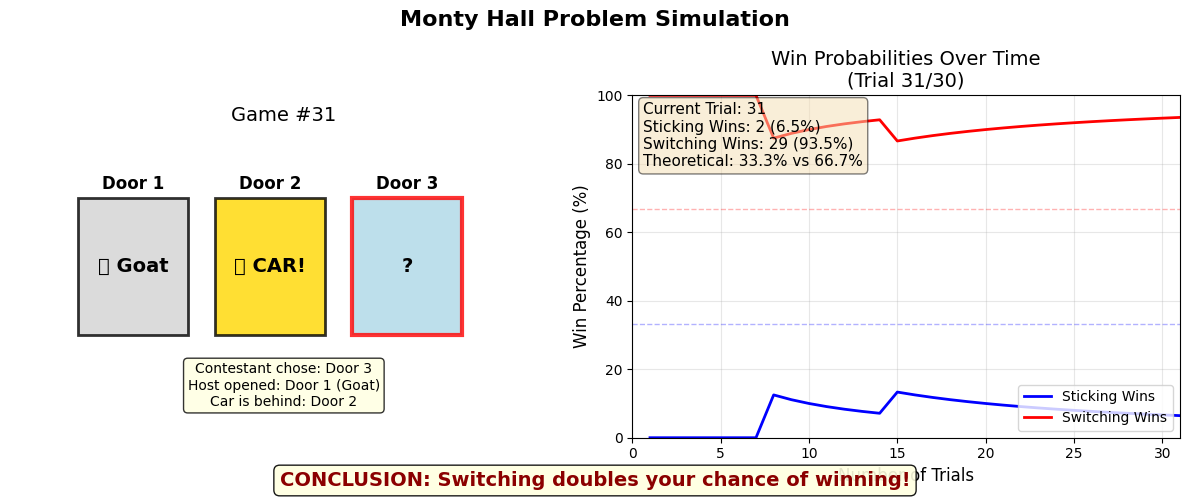

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
import random

class MontyHallAnimation:
    def __init__(self, num_simulations=100):
        self.num_simulations = num_simulations
        self.sim_count = 0
        self.stick_wins = 0
        self.switch_wins = 0

        # Create figure
        self.fig, (self.ax1, self.ax2) = plt.subplots(1, 2, figsize=(12, 5))
        self.fig.suptitle('Monty Hall Problem Simulation', fontsize=16, fontweight='bold')

        # Setup doors
        self.door_colors = ['lightblue', 'lightblue', 'lightblue']
        self.door_texts = ['Door 1', 'Door 2', 'Door 3']
        self.prize_texts = ['?', '?', '?']

        # Car and goats positions (will be set each simulation)
        self.car_door = None
        self.first_choice = None
        self.host_opens = None

        # Statistics
        self.stick_probs = []
        self.switch_probs = []
        self.trials = []

        # Create initial plot
        self.setup_plot()

    def setup_plot(self):
        """Setup the initial plot"""
        # Clear axes
        self.ax1.clear()
        self.ax2.clear()

        # Left plot: Doors
        self.ax1.set_xlim(-0.5, 3.5)
        self.ax1.set_ylim(-0.5, 1.5)
        self.ax1.set_aspect('equal')
        self.ax1.set_title('Current Game', fontsize=14)
        self.ax1.axis('off')

        # Draw doors
        self.door_rects = []
        for i in range(3):
            rect = patches.Rectangle((i, 0), 0.8, 1,
                                    linewidth=2,
                                    edgecolor='black',
                                    facecolor=self.door_colors[i],
                                    alpha=0.8)
            self.ax1.add_patch(rect)
            self.door_rects.append(rect)

            # Door number
            self.ax1.text(i + 0.4, 1.1, f'Door {i+1}',
                         ha='center', va='center', fontsize=12, fontweight='bold')

            # Prize (hidden initially)
            self.ax1.text(i + 0.4, 0.5, '?',
                         ha='center', va='center', fontsize=20, fontweight='bold')

        # Right plot: Statistics
        self.ax2.set_xlim(0, self.num_simulations)
        self.ax2.set_ylim(0, 100)
        self.ax2.set_xlabel('Number of Trials', fontsize=12)
        self.ax2.set_ylabel('Win Percentage (%)', fontsize=12)
        self.ax2.set_title('Win Probabilities Over Time', fontsize=14)
        self.ax2.grid(True, alpha=0.3)

        # Add legend placeholder
        self.ax2.plot([], [], 'b-', linewidth=2, label='Sticking Wins')
        self.ax2.plot([], [], 'r-', linewidth=2, label='Switching Wins')
        self.ax2.legend(loc='lower right')

        # Add text for current stats
        self.stats_text = self.ax2.text(0.02, 0.98, '',
                                       transform=self.ax2.transAxes,
                                       verticalalignment='top',
                                       fontsize=11,
                                       bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    def run_simulation(self):
        """Run one Monty Hall simulation"""
        # Randomly place car and goats
        self.car_door = random.randint(0, 2)

        # Contestant's first choice
        self.first_choice = random.randint(0, 2)

        # Host opens a door with a goat (not contestant's choice)
        available_doors = [0, 1, 2]
        available_doors.remove(self.first_choice)

        if self.car_door in available_doors:
            available_doors.remove(self.car_door)

        self.host_opens = random.choice(available_doors)

        # Determine switch door
        remaining_doors = [0, 1, 2]
        remaining_doors.remove(self.first_choice)
        remaining_doors.remove(self.host_opens)
        switch_door = remaining_doors[0]

        # Update wins
        self.sim_count += 1
        if self.first_choice == self.car_door:
            self.stick_wins += 1
        if switch_door == self.car_door:
            self.switch_wins += 1

        # Update probabilities
        stick_prob = (self.stick_wins / self.sim_count) * 100
        switch_prob = (self.switch_wins / self.sim_count) * 100

        self.stick_probs.append(stick_prob)
        self.switch_probs.append(switch_prob)
        self.trials.append(self.sim_count)

        return stick_prob, switch_prob

    def update_plot(self, frame):
        """Update the animation frame"""
        # Run one simulation
        stick_prob, switch_prob = self.run_simulation()

        # Clear and redraw left plot (doors)
        self.ax1.clear()
        self.ax1.set_xlim(-0.5, 3.5)
        self.ax1.set_ylim(-0.5, 1.5)
        self.ax1.set_aspect('equal')
        self.ax1.set_title(f'Game #{self.sim_count}', fontsize=14)
        self.ax1.axis('off')

        # Draw doors with appropriate colors
        for i in range(3):
            # Determine door color
            if i == self.car_door:
                door_color = 'gold'  # Car is behind this door
                prize_text = '🚗 CAR!'
            elif i == self.host_opens:
                door_color = 'lightgray'  # Opened door
                prize_text = '🐐 Goat'
            else:
                door_color = 'lightblue'  # Closed door
                prize_text = '?'

            # Draw door rectangle
            rect = patches.Rectangle((i, 0), 0.8, 1,
                                    linewidth=3 if i == self.first_choice else 2,
                                    edgecolor='red' if i == self.first_choice else 'black',
                                    facecolor=door_color,
                                    alpha=0.8)
            self.ax1.add_patch(rect)

            # Door number
            self.ax1.text(i + 0.4, 1.1, f'Door {i+1}',
                         ha='center', va='center', fontsize=12, fontweight='bold')

            # What's behind the door (revealed for opened door and car at end)
            if i == self.host_opens or (frame == self.num_simulations - 1):
                self.ax1.text(i + 0.4, 0.5, prize_text,
                             ha='center', va='center', fontsize=14, fontweight='bold')
            else:
                self.ax1.text(i + 0.4, 0.5, '?',
                             ha='center', va='center', fontsize=20, fontweight='bold')

        # Add text annotations
        info_text = f"Contestant chose: Door {self.first_choice + 1}\n"
        info_text += f"Host opened: Door {self.host_opens + 1} (Goat)\n"
        info_text += f"Car is behind: Door {self.car_door + 1}"

        self.ax1.text(1.5, -0.2, info_text,
                     ha='center', va='top', fontsize=10,
                     bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

        # Update right plot (statistics)
        self.ax2.clear()
        self.ax2.set_xlim(0, max(10, self.sim_count))
        self.ax2.set_ylim(0, 100)
        self.ax2.set_xlabel('Number of Trials', fontsize=12)
        self.ax2.set_ylabel('Win Percentage (%)', fontsize=12)
        self.ax2.set_title(f'Win Probabilities Over Time\n(Trial {self.sim_count}/{self.num_simulations})', fontsize=14)
        self.ax2.grid(True, alpha=0.3)

        # Plot probability curves
        if len(self.trials) > 0:
            self.ax2.plot(self.trials, self.stick_probs, 'b-', linewidth=2, label='Sticking Wins')
            self.ax2.plot(self.trials, self.switch_probs, 'r-', linewidth=2, label='Switching Wins')

            # Add horizontal lines at theoretical values
            self.ax2.axhline(y=33.33, color='b', linestyle='--', alpha=0.3, linewidth=1)
            self.ax2.axhline(y=66.67, color='r', linestyle='--', alpha=0.3, linewidth=1)

        self.ax2.legend(loc='lower right')

        # Update statistics text
        stats_text = f"Current Trial: {self.sim_count}\n"
        stats_text += f"Sticking Wins: {self.stick_wins} ({stick_prob:.1f}%)\n"
        stats_text += f"Switching Wins: {self.switch_wins} ({switch_prob:.1f}%)\n"
        stats_text += f"Theoretical: 33.3% vs 66.7%"

        self.ax2.text(0.02, 0.98, stats_text,
                     transform=self.ax2.transAxes,
                     verticalalignment='top',
                     fontsize=11,
                     bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

        # Add final message if done
        if frame == self.num_simulations - 1:
            conclusion = "CONCLUSION: Switching doubles your chance of winning!"
            self.fig.text(0.5, 0.02, conclusion,
                         ha='center', va='bottom', fontsize=14,
                         fontweight='bold', color='darkred',
                         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.9))

        return self.ax1, self.ax2

    def animate(self):
        """Create the animation"""
        anim = animation.FuncAnimation(self.fig, self.update_plot,
                                      frames=self.num_simulations,
                                      interval=500,  # 0.5 seconds between frames
                                      repeat=False)
        return anim

def create_monty_hall_video(num_simulations=50, save_as_gif=False, filename='monty_hall.gif'):
    """
    Create and save a Monty Hall animation

    Parameters:
    num_simulations: Number of games to simulate
    save_as_gif: If True, save as GIF file
    filename: Name of output file
    """
    print("Creating Monty Hall animation...")
    print(f"Running {num_simulations} simulations...")

    # Create animation
    mh = MontyHallAnimation(num_simulations)
    anim = mh.animate()

    # Save as GIF if requested
    if save_as_gif:
        print(f"Saving animation to {filename}...")
        anim.save(filename, writer='pillow', fps=2)
        print(f"Animation saved to {filename}")

    # Show the animation
    plt.tight_layout()
    plt.show()

    return anim

# Run the animation
if __name__ == "__main__":
    # For quick testing: 20 simulations (shows the trend clearly)
    anim = create_monty_hall_video(num_simulations=30, save_as_gif=True)